In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/UNCC/Fall 2025/Data Mining/2019.csv')
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [4]:
df.columns.tolist()

['Overall rank',
 'Country or region',
 'Score',
 'GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

# Data Understanding/Visualization

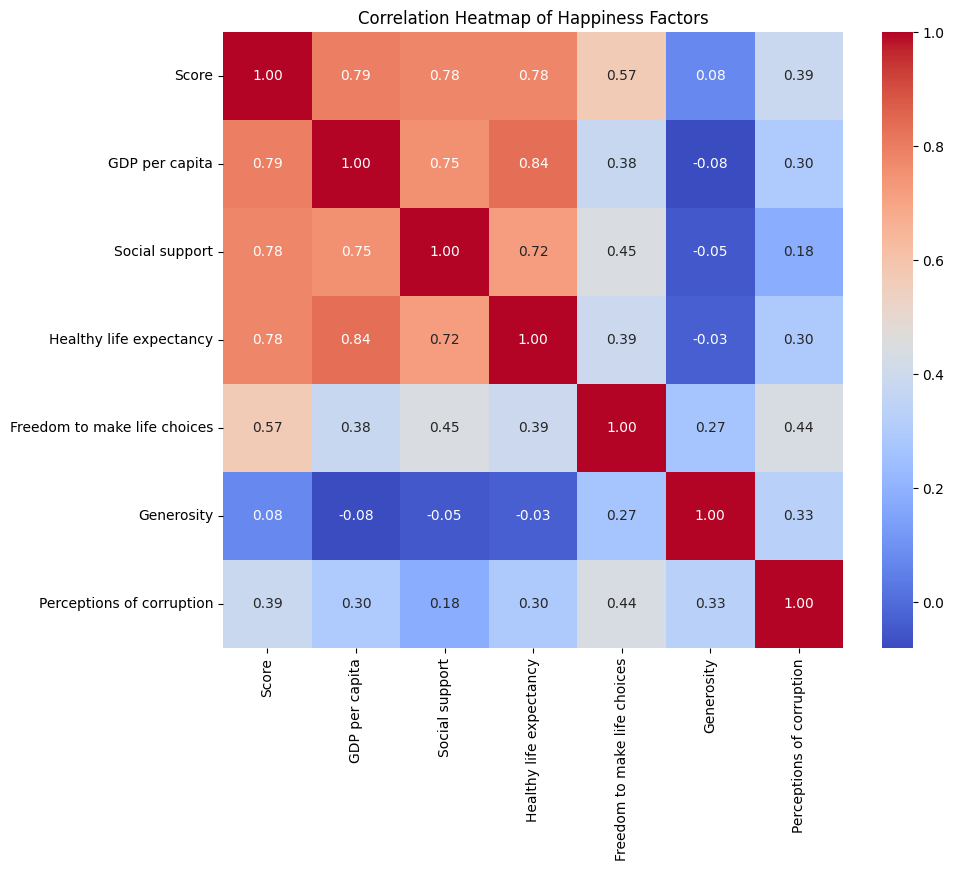

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns for correlation
correlation_cols = ['Score', 'GDP per capita', 'Social support',
                    'Healthy life expectancy', 'Freedom to make life choices',
                    'Generosity', 'Perceptions of corruption']
df_corr = df[correlation_cols]

# Calculate the correlation matrix
corr_matrix = df_corr.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Happiness Factors')
plt.show()

## Interpretation
- **Score tracks strongly with GDP, social support, and healthy life expectancy** (≈0.78–0.79). These three also correlate tightly with one another (GDP↔life exp ≈0.84; GDP↔social ≈0.75; social↔life exp ≈0.72).
- **Freedom** has a **moderate** link to Score (~0.57) and mild ties to other features (~0.38–0.45).
- **Perceptions of corruption** shows **moderate** positive links to Score (~0.39) and to freedom (~0.44), weaker with the rest (~0.18–0.33).
- **Generosity** is **near-zero with almost everything** (−0.08 to +0.33, mostly tiny).
➜ Largely orthogonal; won’t drive clusters much.

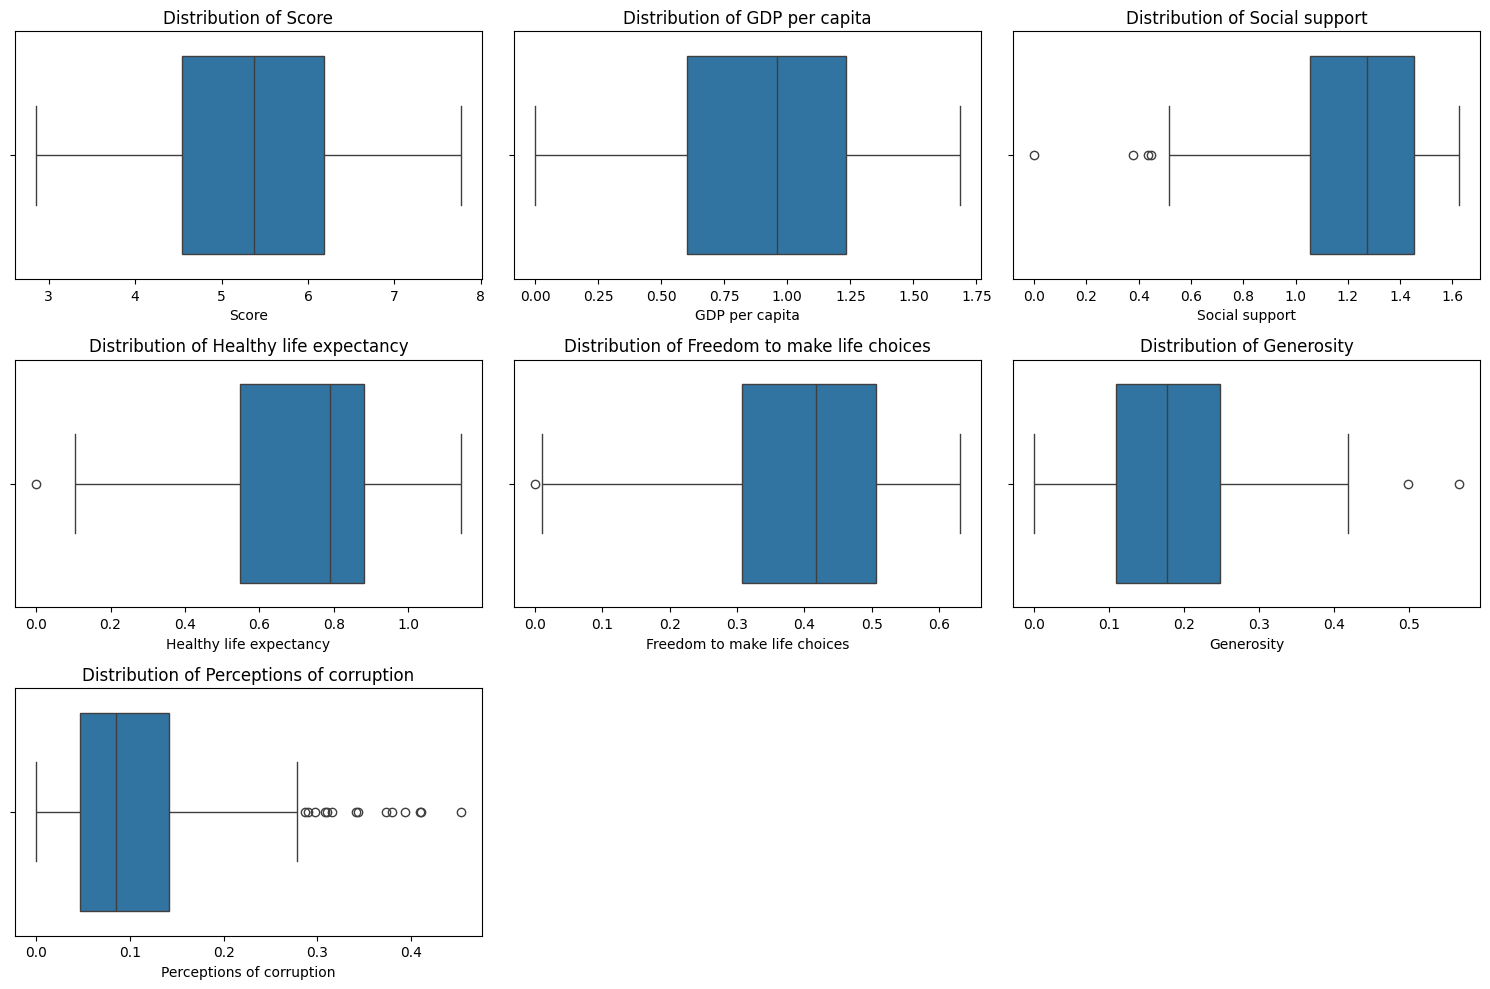

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

features_to_plot = ['Score', 'GDP per capita', 'Social support',
                    'Healthy life expectancy', 'Freedom to make life choices',
                    'Generosity', 'Perceptions of corruption']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

## Interpretation
- **GDP, Social support, Healthy life expectancy**: fairly tight interquartile range with a few **low-end outliers**. This is consistent, since most countries may sit mid-high and a few trail behind.
- **Freedom**: moderate spread; fewer extreme points.
- **Generosity: right-skewed** with several **high outliers**. This feature could dominate distance for a few countries unless scaled/trimmed.
- **Perceptions of corruption: right-skewed** with scattered high points. Similar to Generosity.

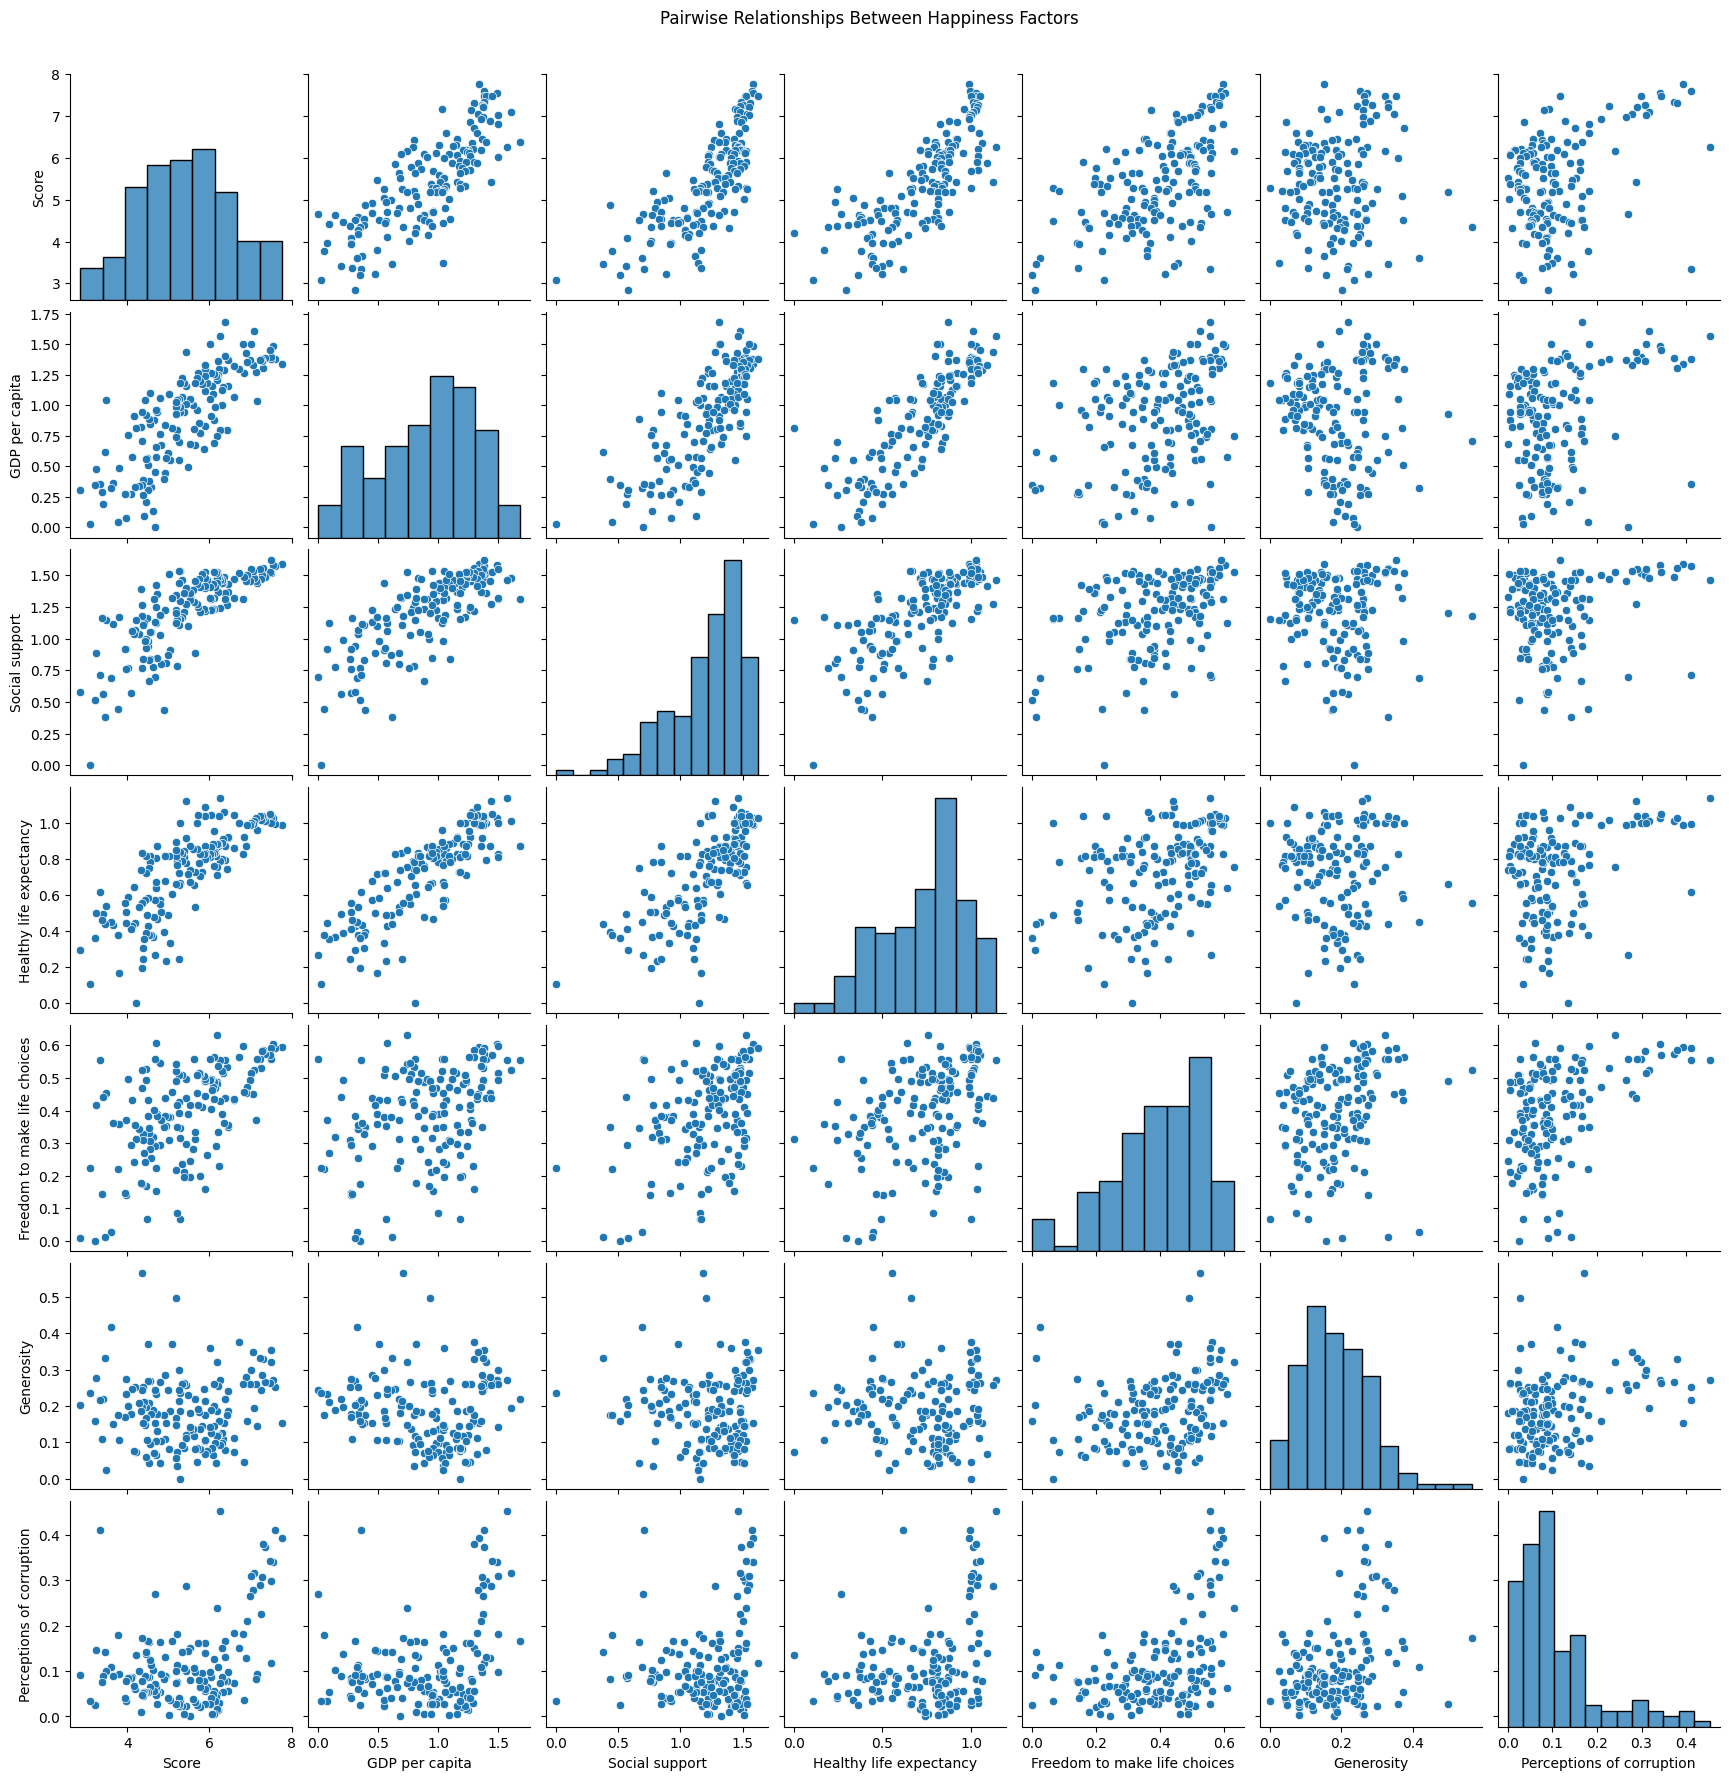

In [7]:
import seaborn as sns

features_to_plot = ['Score', 'GDP per capita', 'Social support',
                    'Healthy life expectancy', 'Freedom to make life choices',
                    'Generosity', 'Perceptions of corruption']

sns.pairplot(df[features_to_plot])
plt.suptitle('Pairwise Relationships Between Happiness Factors', y=1.02)
plt.show()

## Interpretation
There are **two dominant relationships**
1. **Strong positive linear trends** between **GDP per capita, Social support, Healthy life expectancy**, and **Score**.
   - Whenever GDP rises, life expectancy and happiness tend to rise together.
2. **Moderate correlations** between **Freedom to make life choices** and those same development features.

Countries with higher economic and social development often report greater freedom.

**Score vs GDP / Social support / Life expectancy**: Clear upward slopes, these variables move almost in step.

**Freedom**: weaker, more scattered, but still an upward pattern with Score. May help to separate "developed but less free" vs "developed and free countries".

**Generosity**: shows **no strong trend with any variable**, appearing random, confirming heatmap interpretation.

**Perceptions of corruption**: a little right-skew and mild positive association with Score and Freedom, but lots of scatter.

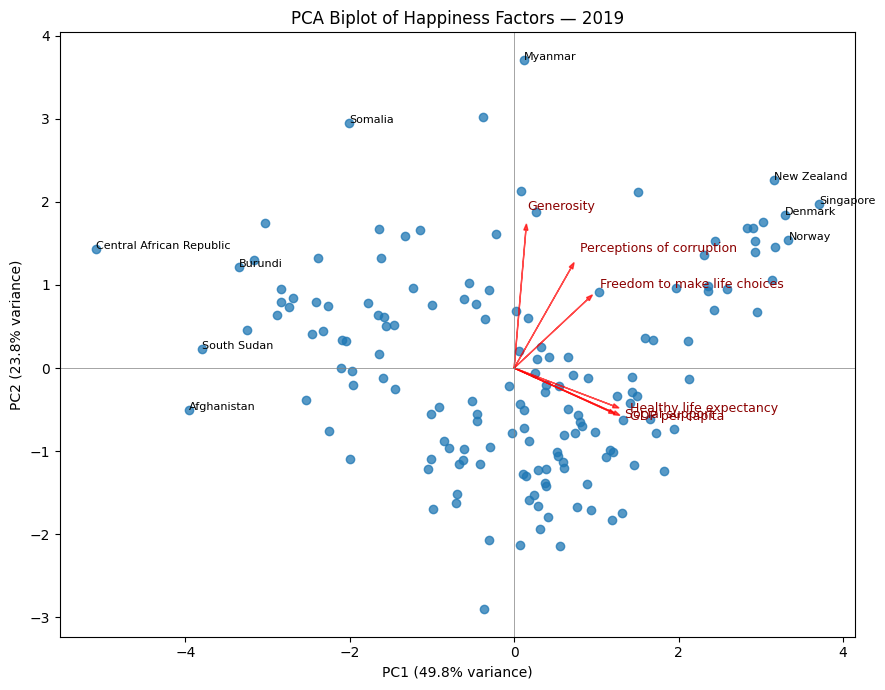

In [8]:
# --- PCA Biplot for World Happiness 2019 ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# === 2. Standardize column names ===
rename_map = {
    "Country or region": "Country",
    "GDP per capita": "GDP per capita",
    "Social support": "Social support",
    "Healthy life expectancy": "Healthy life expectancy",
    "Freedom to make life choices": "Freedom to make life choices",
    "Generosity": "Generosity",
    "Perceptions of corruption": "Perceptions of corruption",
    "Score": "Score",
}

df = df.rename(columns=rename_map)

# === 3. Define features ===
FEATURES = [
    "GDP per capita",
    "Social support",
    "Healthy life expectancy",
    "Freedom to make life choices",
    "Generosity",
    "Perceptions of corruption",
]

# Drop missing rows for safety
df = df.dropna(subset=FEATURES + ["Country"])

# === 4. Standardize features ===
X = df[FEATURES].values
scaler = StandardScaler()
Xz = scaler.fit_transform(X)

# === 5. Run PCA ===
pca = PCA(n_components=2, random_state=0)
Z = pca.fit_transform(Xz)
expl = pca.explained_variance_ratio_

# === 6. PCA biplot ===
fig, ax = plt.subplots(figsize=(9, 7))
ax.scatter(Z[:, 0], Z[:, 1], alpha=0.75)

# Optionally label a few extreme points
idx = np.argsort(np.linalg.norm(Z, axis=1))[-10:]
for i in idx:
    ax.text(Z[i, 0], Z[i, 1], df.iloc[i]["Country"], fontsize=8)

# Add feature loadings (arrows)
loadings = pca.components_.T
arrow_scale = 2.5
for i, f in enumerate(FEATURES):
    ax.arrow(
        0, 0,
        loadings[i, 0] * arrow_scale,
        loadings[i, 1] * arrow_scale,
        head_width=0.05,
        length_includes_head=True,
        color="red",
        alpha=0.7,
    )
    ax.text(
        loadings[i, 0] * arrow_scale * 1.1,
        loadings[i, 1] * arrow_scale * 1.1,
        f,
        fontsize=9,
        color="darkred",
    )

ax.axhline(0, lw=0.5, color="gray")
ax.axvline(0, lw=0.5, color="gray")
ax.set_xlabel(f"PC1 ({expl[0]*100:.1f}% variance)")
ax.set_ylabel(f"PC2 ({expl[1]*100:.1f}% variance)")
ax.set_title("PCA Biplot of Happiness Factors — 2019")
plt.tight_layout()
plt.show()


# Interpretation
- **PC1 (x-axis)** explains **49.8%** of the total variance — that’s almost half of all information in your six factors.
- **PC2 (y-axis)** explains another **≈23.8%**, meaning the first two principal components together capture around **73.6%** of the total variation** — excellent coverage for visualization.

1. **PC1**
   - **GDP per capita, Healthy life expectancy, and Social support** cluster together in direction. These variables are **positively correlated** and define a "development and well-being"** axis.
   - Countries on the **right-hand side (positive PC1)**, like *Singapore, Denmark, Norway, New Zealand*, score high on all three.
   - Countries on the **left-hand side (negative PC1)**, like *Afghanistan, Burundi, Central African Republic*, score low.

We can say that PC1 represents "overall prosperity and social development.

2. **PC2**
   - **Generosity, Perceptions of corruption, and Freedom to make life choices** load positively on PC2. This means PC2 reflects **social trust, integrity, and personal freedom, a kind of governance/autonomy dimension**.
   - Countries like Myanmar (very high on PC2) might be outliers due to unusually high generosity scores, while Somalia and Central African Republic also stand apart.

We can say that PC2 represents "social trust and freedom."

## Relationship between features
- Arrows pointing in **similar directions** = positively correlated (GDP, life expectancy, social support)
- Right angles = weak correlation (e.g., GDP vs generosity)
- Opposite directions = negative correlation (no strong negatives, just weak relationships)

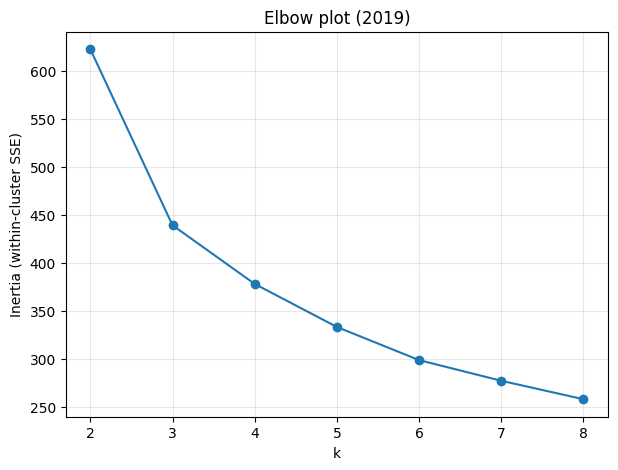

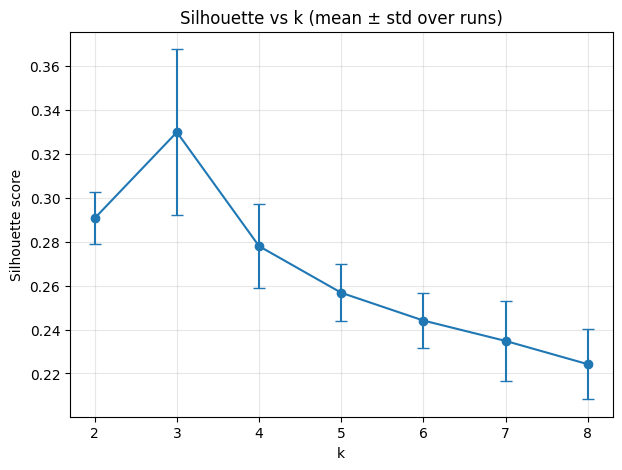

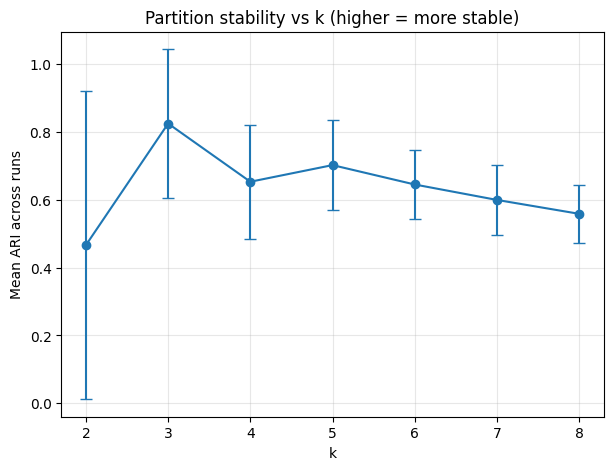

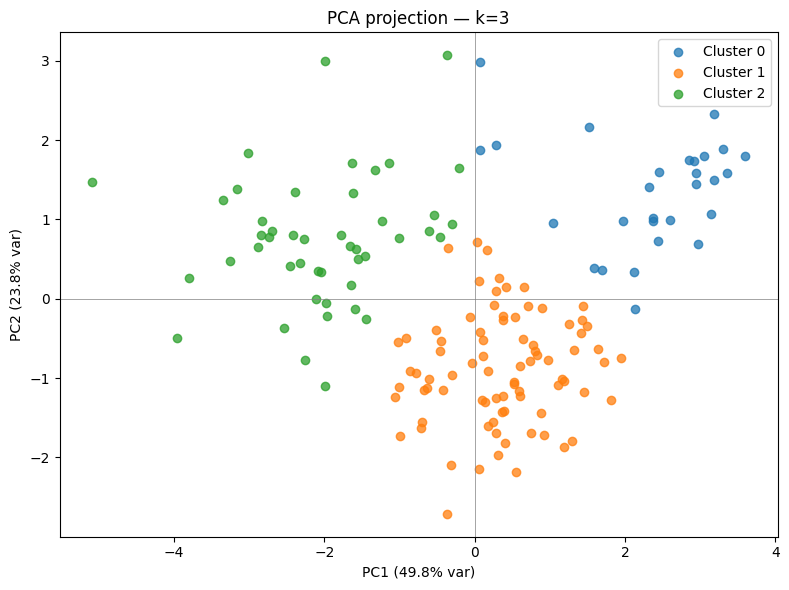


Cluster centroids in ORIGINAL feature scale (2019):
   GDP per capita  Social support  Healthy life expectancy  \
0           1.320           1.459                    0.939   
1           1.045           1.313                    0.820   
2           0.403           0.871                    0.426   

   Freedom to make life choices  Generosity  Perceptions of corruption  
0                         0.542       0.293                      0.247  
1                         0.379       0.132                      0.069  
2                         0.325       0.210                      0.100  

=== Cluster 0 (n=28) sample ===
                 Country  GDP per capita  Social support  \
28                 Qatar           1.684           1.313   
13            Luxembourg           1.609           1.479   
33             Singapore           1.572           1.463   
20  United Arab Emirates           1.503           1.310   
15               Ireland           1.499           1.553   
2            

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score


df = df.dropna(subset=FEATURES + ["Country"]).reset_index(drop=True)

# ========= 2) Optional winsorization (cap extreme tails) =========
DO_WINSORIZE = True
if DO_WINSORIZE:
    for col in ["Generosity","Perceptions of corruption"]:
        lo, hi = df[col].quantile([0.01, 0.99]).values
        df[col] = df[col].clip(lo, hi)

# ========= 3) Standardize =========
scaler = StandardScaler()
X = scaler.fit_transform(df[FEATURES].values)

# ========= 4) Evaluate k via elbow, silhouette, and stability =========
Ks = range(2, 9)
inertias = []
sil_means, sil_stds = [], []
stability_means, stability_stds = [], []

R = 20  # repeated runs per k for stability
for k in Ks:
    # elbow (use a single well-initialized run)
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)
    # silhouette & stability across repeated runs
    sil_scores = []
    labels_list = []
    for r in range(R):
        kmr = KMeans(n_clusters=k, n_init=1, init="k-means++", random_state=1000+r)
        lbl = kmr.fit_predict(X)
        labels_list.append(lbl)
        sil_scores.append(silhouette_score(X, lbl))
    sil_means.append(np.mean(sil_scores))
    sil_stds.append(np.std(sil_scores))
    # pairwise ARI across runs -> stability
    ARIs = []
    for i in range(R):
        for j in range(i+1, R):
            ARIs.append(adjusted_rand_score(labels_list[i], labels_list[j]))
    stability_means.append(np.mean(ARIs))
    stability_stds.append(np.std(ARIs))

# --- Plot: Elbow ---
plt.figure(figsize=(7,5))
plt.plot(list(Ks), inertias, marker="o")
plt.xlabel("k"); plt.ylabel("Inertia (within-cluster SSE)")
plt.title("Elbow plot (2019)")
plt.grid(True, alpha=0.3)
plt.show()

# --- Plot: Silhouette mean ± std ---
plt.figure(figsize=(7,5))
plt.errorbar(list(Ks), sil_means, yerr=sil_stds, marker="o", capsize=4)
plt.xlabel("k"); plt.ylabel("Silhouette score")
plt.title("Silhouette vs k (mean ± std over runs)")
plt.grid(True, alpha=0.3)
plt.show()

# --- Plot: Stability (mean ARI across runs) ---
plt.figure(figsize=(7,5))
plt.errorbar(list(Ks), stability_means, yerr=stability_stds, marker="o", capsize=4)
plt.xlabel("k"); plt.ylabel("Mean ARI across runs")
plt.title("Partition stability vs k (higher = more stable)")
plt.grid(True, alpha=0.3)
plt.show()

# ========= 5) Choose k (set manually after inspecting plots) =========
BEST_K = 3

km_final = KMeans(n_clusters=BEST_K, n_init=50, random_state=7)
labels = km_final.fit_predict(X)

# ========= 6) 2D PCA preview colored by cluster =========
pca = PCA(n_components=2, random_state=0)
Z = pca.fit_transform(X)
expl = pca.explained_variance_ratio_

plt.figure(figsize=(8,6))
for c in range(BEST_K):
    idx = labels == c
    plt.scatter(Z[idx,0], Z[idx,1], alpha=0.75, label=f"Cluster {c}")
plt.axhline(0, lw=0.5, color="gray"); plt.axvline(0, lw=0.5, color="gray")
plt.xlabel(f"PC1 ({expl[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({expl[1]*100:.1f}% var)")
plt.title(f"PCA projection — k={BEST_K}")
plt.legend()
plt.tight_layout()
plt.show()

# ========= 7) Human-friendly centroids (inverse-transform) =========
centroids_std = km_final.cluster_centers_
centroids_orig = scaler.inverse_transform(centroids_std)
centroids_df = pd.DataFrame(centroids_orig, columns=FEATURES)
print("\nCluster centroids in ORIGINAL feature scale (2019):")
print(centroids_df.round(3))

# Attach cluster labels to countries for inspection
out = df[["Country"] + FEATURES].copy()
out["cluster"] = labels
# Example peek: top 8 countries in each cluster by GDP
for c in range(BEST_K):
    print(f"\n=== Cluster {c} (n={sum(labels==c)}) sample ===")
    print(out[out["cluster"]==c].sort_values("GDP per capita", ascending=False).head(8)[["Country"]+FEATURES])


# Interpretation

### Elbow Plot
The biggest drop is k = 2 to 3, then a smaller but noticeable drop at k = 3 to 4. After k = 4, the curve flattens, returning steadily. The "knee" looks around 3-4. Past 6, gains are tiny.
- Candidate k values are **3 or 4**.

### Silhouette Plot
- The **peak silhouette score** is at 88k = 3**, around **0.33-0.34**, which indicates relatively well-separated clusters.
- After k = 3, the score drops steadily.
- **Higher silhouette = better-defined clusters**, so k = 3 offers the best balance between separation and compactness.

From both the **elbow and silhouette** visualiations, **k = 3** looks the best.

### Stability Plot
- **k = 3** stands out again. It has the highest average ARI and very good consistency.
- Stability drops a bit at k = 4, then fluctuates, but never exceeds the stability seen at k = 3.

All three visualizations (Elbow, Silhouette, Stability) point to **k = 3** as the most balanced and reliable choice for clustering.

# Preprocessing
Making sure each feature contributes proportionally to distance calculations in k-means clustering. The earlier plots showed that *Generosity* and *Perceptions of corruption* were right-skewed with high-value outliers.

Because extreme points can distort distance calculations, these two variables will be **Winsorized**, capped at the 1st and 99th percentiles, before standardization.

All six clustering features will then be **z-scored** (mean 0, SD 1) using StandardScaler, so variables measured on different scales can be comparable.

In [10]:
# --- Data Pre-processing for 2019 clustering ---
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = df.dropna(subset=FEATURES + ["Country"]).reset_index(drop=True)

# 2. Winsorize long-tailed variables (cap at 1st and 99th percentile)
for col in ["Generosity", "Perceptions of corruption"]:
    lo, hi = df[col].quantile([0.01, 0.99]).values
    df[col] = df[col].clip(lo, hi)

# 3. Standardize (z-score)
scaler = StandardScaler()
X = scaler.fit_transform(df[FEATURES])

# Optional: check that mean≈0, SD≈1
import numpy as np
print("Means:", np.round(X.mean(axis=0), 3))
print("Stds:",  np.round(X.std(axis=0), 3))


Means: [-0. -0. -0. -0.  0. -0.]
Stds: [1. 1. 1. 1. 1. 1.]


# Clustering with K-Means

Silhouette (k=3): 0.343

Centroids (original scale):
           GDP per capita  Social support  Healthy life expectancy  \
Cluster 0           1.320           1.459                    0.939   
Cluster 1           1.045           1.313                    0.820   
Cluster 2           0.403           0.871                    0.426   

           Freedom to make life choices  Generosity  Perceptions of corruption  
Cluster 0                         0.542       0.292                      0.247  
Cluster 1                         0.379       0.133                      0.069  
Cluster 2                         0.325       0.210                      0.100  

Counts per cluster:
cluster
0    28
1    82
2    46
Name: count, dtype: int64

Mean Score by cluster (not used for training):
cluster
0    6.728
1    5.598
2    4.263
Name: Score, dtype: float64


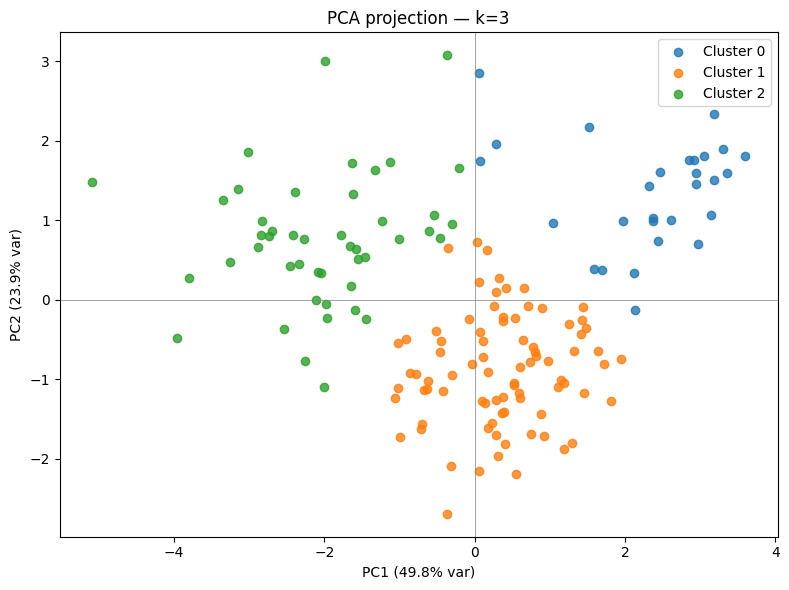

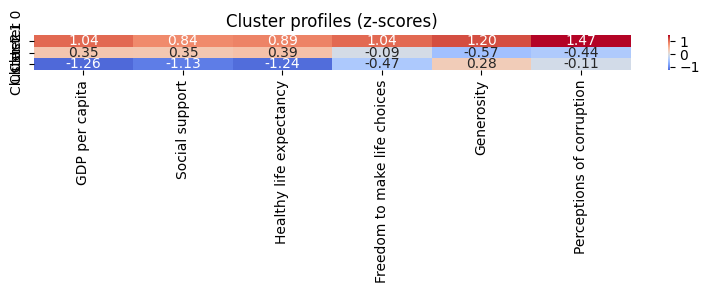


Saved: world_happiness_2019_clusters_k3.csv


In [11]:
# --- K-means results (k=3), visuals, and summaries ---

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

BEST_K = 3

# 1) Fit k-means
km = KMeans(n_clusters=BEST_K, n_init=50, random_state=7)
labels = km.fit_predict(X)
sil = silhouette_score(X, labels)
print(f"Silhouette (k={BEST_K}): {sil:.3f}")

# 2) Centroids in ORIGINAL units (inverse-transform)
centroids_std = km.cluster_centers_
centroids_orig = pd.DataFrame(
    scaler.inverse_transform(centroids_std),
    columns=FEATURES,
)
centroids_orig.index = [f"Cluster {i}" for i in range(BEST_K)]
print("\nCentroids (original scale):")
print(centroids_orig.round(3))

# 3) Attach labels to countries for inspection
df_clusters = df.assign(cluster=labels)
print("\nCounts per cluster:")
print(df_clusters['cluster'].value_counts().sort_index())

# (Optional but useful) — bring in Score just for validation if present:
has_score = "Score" in df.columns
if has_score:
    print("\nMean Score by cluster (not used for training):")
    print(df_clusters.groupby("cluster")["Score"].mean().round(3))

# 4) PCA projection colored by cluster
pca = PCA(n_components=2, random_state=0)
Z = pca.fit_transform(X)
expl = pca.explained_variance_ratio_

plt.figure(figsize=(8,6))
for c in range(BEST_K):
    idx = labels == c
    plt.scatter(Z[idx,0], Z[idx,1], alpha=0.8, label=f"Cluster {c}")
plt.axhline(0, lw=0.5, color="gray"); plt.axvline(0, lw=0.5, color="gray")
plt.xlabel(f"PC1 ({expl[0]*100:.1f}% var)"); plt.ylabel(f"PC2 ({expl[1]*100:.1f}% var)")
plt.title(f"PCA projection — k={BEST_K}")
plt.legend()
plt.tight_layout()
plt.show()

# 5) Quick profile heatmap (cluster means in z-space so features are comparable)
import seaborn as sns
profile = pd.DataFrame(km.cluster_centers_, columns=FEATURES)
profile.index = [f"Cluster {i}" for i in range(BEST_K)]
plt.figure(figsize=(8,3))
sns.heatmap(profile, annot=True, fmt=".2f", center=0, cmap="coolwarm")
plt.title("Cluster profiles (z-scores)")
plt.tight_layout()
plt.show()

# 6) Export country assignments (for your appendix/report)
df_clusters[["Country","cluster"] + FEATURES].sort_values(["cluster","Country"]).to_csv(
    "world_happiness_2019_clusters_k3.csv", index=False
)
print("\nSaved: world_happiness_2019_clusters_k3.csv")


## Interpretation

- **Silhouette = 0.343** = respectable separation for real-world country data
- **Cluster sizes:** 28/82/46 = balanced enough (no tiny clusters)
- **Score check (not used in training)** orders C0 > C1 > C2 (6.73 > 5.60 > 4.26), which validates the archetype stou


